<p align = "center" draggable=”false” ><img src="https://user-images.githubusercontent.com/37101144/161836199-fdb0219d-0361-4988-bf26-48b0fad160a3.png" 
     width="200px"
     height="auto"/>
</p>

# Launch New Products

Today you are a machine learning engineer at the Department of New Products at Target Cosmetics! 

We will start with a small dataset on interactions between users and current products from the past and try to discover substructure, if there's any, by applying some **unsupervised learning** methods. 

Then we will leverage the small amount of labeled data (current products) in combination with a larger amount of unlabeled data (new products to launch) to make estimations as to which products with sell more. 

## Learning Objectives

By the end of this session, you will be able to:

- apply dimensionality reduction techniques to reduce features to a lower dimensional space
- perform customer segmentation, determine optional number of clusters, and understand assumptions for used algorithm
- understand what semi-supervised learning is and leverage it to improve performance of supervised learning

## Task 1. Dimensionality Reduction

1. Load in the data. 
    
    Import `pandas` as `pd` and use `pd.read_csv()` to read in `past.csv.gz` in the `dat` folder, saving it as `past`. 
    
    Data in `past.csv.gz` was propcessed; e.g., features indicating time of day, day of week, month, and year of the purchase have been converted to one-hot representations of these categories. 

In [1]:
# YOUR CODE HERE
import pandas as pd
past = pd.read_csv('../dat/past.csv.gz')

In [2]:
past.columns

Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')

<details>
<summary> Expected output </summary>

```
Index(['product_id', 'user_id', 'NumOfEventsInJourney', 'NumSessions',
       'interactionTime', 'maxPrice', 'minPrice', 'NumCart', 'NumView',
       'NumRemove', 'InsessionCart', 'InsessionView', 'InsessionRemove',
       'Weekend', 'Fr', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', '2019',
       '2020', 'Jan', 'Feb', 'Oct', 'Nov', 'Dec', 'Afternoon', 'Dawn',
       'EarlyMorning', 'Evening', 'Morning', 'Night', 'Purchased?', 'Noon',
       'Category'],
      dtype='object')
```
</details>

2. What percentage of the interactions (rows) resulted in a purchase?

    Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    
    From the classification perspective, is the data balanced?

In [3]:
past.describe()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5.573727e+06,5.235286e+08,1.951080,1.327052,2.490234e+05,7.457600,7.426321,0.541953,0.893687,0.413592,...,0.169931,0.213311,0.065900,0.162676,0.244012,0.169207,0.085550,0.343800,0.059343,1.143728
std,1.161840e+06,5.998702e+07,1.324727,0.718266,6.920382e+05,11.883206,11.876266,0.565350,0.841036,0.772170,...,0.255599,0.275556,0.172911,0.246050,0.289270,0.252342,0.191101,0.475023,0.153912,0.438141
min,4.104000e+03,6.524181e+07,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.760491e+06,4.998498e+08,1.000000,1.000000,0.000000e+00,2.483750,2.480000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,5.830816e+06,5.343735e+08,1.750000,1.166667,3.626375e+03,4.440585,4.440000,0.500000,1.000000,0.222222,...,0.000000,0.142857,0.000000,0.000000,0.181818,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5.875312e+06,5.616843e+08,2.308355,1.500000,2.071993e+05,7.620000,7.550000,0.858766,1.000000,0.632775,...,0.250000,0.333333,0.040000,0.250000,0.363636,0.250000,0.090909,1.000000,0.041888,1.045996
max,5.932538e+06,6.220262e+08,40.000000,28.000000,1.087537e+07,236.510000,236.510000,12.000000,28.000000,38.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [4]:
past.head()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category
0,5866936,5.618978e+08,1.333333,1.333333,5550.000,15.84000,15.84000,0.00,1.333333,0.00,...,0.00,0.000,0.0,0.666667,0.333333,0.00,0.00,0,0.00,1.0
1,5647110,5.326529e+08,2.250000,1.500000,27556.500,5.80000,5.56500,1.25,0.250000,0.25,...,0.25,0.750,0.0,0.000000,0.250000,0.00,0.00,0,0.00,1.0
2,5790472,4.578109e+08,1.000000,1.000000,0.000,6.27250,6.27250,0.25,0.750000,0.00,...,0.00,0.000,0.0,0.000000,0.750000,0.25,0.00,0,0.00,1.0
3,5811598,4.612641e+08,1.500000,1.500000,131532.500,5.56000,5.56000,0.25,1.000000,0.25,...,0.25,0.000,0.0,0.000000,0.500000,0.00,0.25,0,0.25,1.0
4,5846363,5.157993e+08,1.875000,1.375000,11055.875,4.08625,4.08625,0.50,1.000000,0.25,...,0.25,0.375,0.0,0.125000,0.250000,0.25,0.00,1,0.00,1.0


In [5]:
# YOUR CODE HERE .3438
percent_purchases = past['Purchased?'].sum()/len(past['Purchased?'])*100
print(percent_purchases)

34.38


3. Drop `product_id` and `user_id` and save the rest columns to a new `pd.DataFrame`:`X`; then pop the column `'Purchased?'` and save it to `y`.

In [6]:
# YOUR CODE HERE
X = past.drop(columns = ['product_id', 'user_id'])
y = X.pop('Purchased?')
# YOUR CODE HERE

In [7]:
assert X.shape == (5000, 34)
assert y.shape == (5000,)

4. Apply [PCA (check documentation if unfamiliar)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features down to **5**, save it to an numpy array named `X_reduced`. 

    Do you need to preprocess the data before performing PCA? Quick review [here: Importance of feature scaling](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html).
    
    If time permits, read [Does mean centering or feature scaling affect a Principal Component Analysis?](https://sebastianraschka.com/faq/docs/pca-scaling.html) or [discussion 1](https://stats.stackexchange.com/questions/53/pca-on-correlation-or-covariance).

In [8]:
# YOUR CODE HERE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n = 5
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n, copy = True, whiten = True)
X_reduced = pca.fit_transform(X_scaled)

In [9]:
assert X_reduced.shape == (5000, 5)

5. Print out the percentage of variance explained by each of the selected components.

In [10]:
print(X_reduced)

[[ 0.30672523 -0.95450416  0.7748932  -0.00993798  0.54159841]
 [ 0.24325118  0.0085744  -0.44521289  0.22145846  0.44164199]
 [-0.08363996 -0.65366145 -0.31427615 -0.20429092 -0.77947241]
 ...
 [ 1.15162134 -1.3344958  -0.74104968 -0.28315207  1.05824334]
 [ 1.33477199 -1.10056175 -0.72356049  0.46939251  1.17008636]
 [-1.31878328  0.20551161  0.06083148 -0.18756161  0.24088504]]


In [11]:
# YOUR CODE HERE
print(pca.explained_variance_ratio_)

[0.10282353 0.09445863 0.06514407 0.05111007 0.04268761]


6. Review code in functions `visualize_2pcs` and `visualize_3pcs` below and visualize first few principal components in 2D and 3D plots, respectively:

In [12]:
import matplotlib.pyplot as plt

def visualize_2pcs(pcs, y):
    fig, ax = plt.subplots()
    plot = plt.scatter(pcs[:,0], pcs[:,1], c=y) 
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

In [13]:
def visualize_3pcs(pcs, y):
    fig, ax = plt.subplots()
    ax = fig.add_subplot(projection='3d')
    plot = ax.scatter(pcs[:,0], pcs[:,1], pcs[:,2], c=y)
    ax.legend(
        handles=plot.legend_elements()[0], 
        labels=['No', 'Yes'])

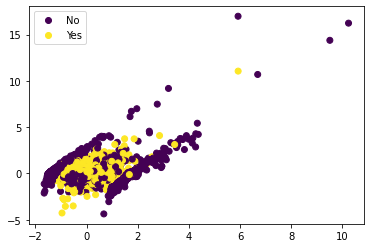

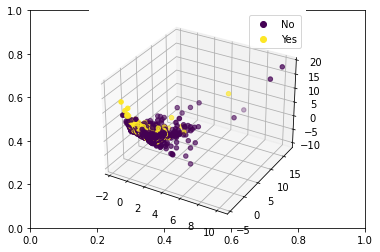

In [14]:
visualize_2pcs(X_reduced,y)
visualize_3pcs(X_reduced, y)

7. One way to assess the quality of the dimensionality reduction, when the groundtruth is available of course, is comparing the prediction performance using given features vs reduced (engineered) features.

    Complete the wrapper function below that 

    - takes features, target, and a boolean parameter indicating whether to include standardization in the pipeline or not
    - split the data into train (80%) and test (20%) datasets, set the random state for spliting at 0
    - build a pipeline that 

        1) preprocessing data using standardization if the `standardize` is `True`; otherwise skip this step  

        2) apply logistic regression ( do you consider data is balanced? )
        
    - fit the pipeline using training data
    - print the classification report (use `sklearn.metrics.classification_report`) on test data

In [22]:
# YOUR CODE HERE (imports!)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

def train(X, y, standardize = True) -> None:
    # YOUR CODE HERE
    lr = LogisticRegression(class_weight = 'balanced')
    
    X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state = 0, train_size = 0.8)
    
    if standardize == True:
        scaler = StandardScaler()
        steps = [('scaler', scaler),
                 ('model', lr)]
    else:
        steps = [('model', lr)]
    pipeline = Pipeline(steps=steps)
    pipeline.fit(X_train,y_train)
    y_preds = pipeline.predict(X_test)
    print(classification_report(y_test, y_preds))

Now apply the pipeline on the all the features `X` and review the performance

In [23]:
train(X, y, standardize = True)

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       649
           1       0.55      0.52      0.54       351

    accuracy                           0.68      1000
   macro avg       0.65      0.65      0.65      1000
weighted avg       0.68      0.68      0.68      1000



In [24]:
train(X_reduced, y, standardize = False)

              precision    recall  f1-score   support

           0       0.74      0.70      0.72       649
           1       0.50      0.55      0.53       351

    accuracy                           0.65      1000
   macro avg       0.62      0.63      0.63      1000
weighted avg       0.66      0.65      0.65      1000



Similarly, apply the pipeline on the reduced / engineered features `X_reduced`. Should you include standardization in the pipeline?

8. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate. 
    *YOUR ANSWER HERE*

## Task 2. Customer Segmentation

In this task, we apply k-means clustering on the reduced data, experimenting different vaules of `n_cluster`, summarize all this information in a single plot, the *Elbow* plot. In addition, leverage silhouette visualization to help decide the "optimal" number of clusters in our data and answer: 

1. Are there any patterns among customer purchasing behaviors?
2. If so, what categories do they belong to? How do you characterize the clusters?
3. If not, what followup steps and / or recommendations will you make as an MLE?

1. Look up the [documentation](https://scikit-learn.org/stable/modules/clustering.html) and import the model class for k-means from `sklearn.cluster`

In [25]:
# YOUR CODE HERE
from sklearn.cluster import KMeans

2. Complete `visualize_elbow`; inspect the code and complete

    - fit k-means on the given data `X` and `k`, setting `random_state` to be 10 for reproducibility
    - append the sum of squared distances of samples to their closest cluster center for each $k$ to list `inertias`

In [26]:
def visualize_elbow(X, ks):
    fig, ax = plt.subplots()
    inertias = []
    for k in ks:
        # YOUR CODE HERE
        kmeans = KMeans(n_clusters = k, random_state = 10).fit(X)
        inertias.append(kmeans.inertia_)
        # YOUR CODE HERE
    plt.plot(ks, inertias)
    plt.xticks(ks)
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow plot')

3. Visualize the elbow plot for the number of clusters ranging between 2 and 9. Discuss with your teammate, what is the 'optimal' number of clusters?
    - 4 to 6 clusters seem like a fine choice. In my work I've had to adjust them for client expectations

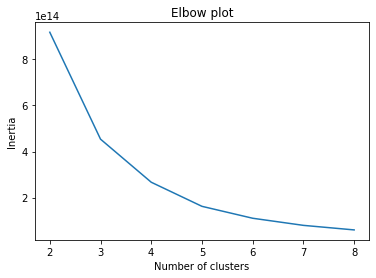

In [27]:
# YOUR CODE HERE
visualize_elbow(X, [i for i in range(2,9)])

4. What are the disadvantage to use the Elbow method? 

5. Let's try a different approach: [silhouette score](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6).

    A helper function `visualize_silhouette` is provided for you (inspect the code in `utils.py`) and figure out how to use it to visualize k-means for k ranges from 2 to 8 on the reduced data. 

In [28]:
from utils import visualize_silhouette

For n_clusters = 2 The average silhouette_score is : 0.1976647357257232
For n_clusters = 3 The average silhouette_score is : 0.2107010081034696
For n_clusters = 4 The average silhouette_score is : 0.21829877771381376
For n_clusters = 5 The average silhouette_score is : 0.21900727313845045
For n_clusters = 6 The average silhouette_score is : 0.22485249451113176
For n_clusters = 7 The average silhouette_score is : 0.2290823415430451
For n_clusters = 8 The average silhouette_score is : 0.22601433341190735


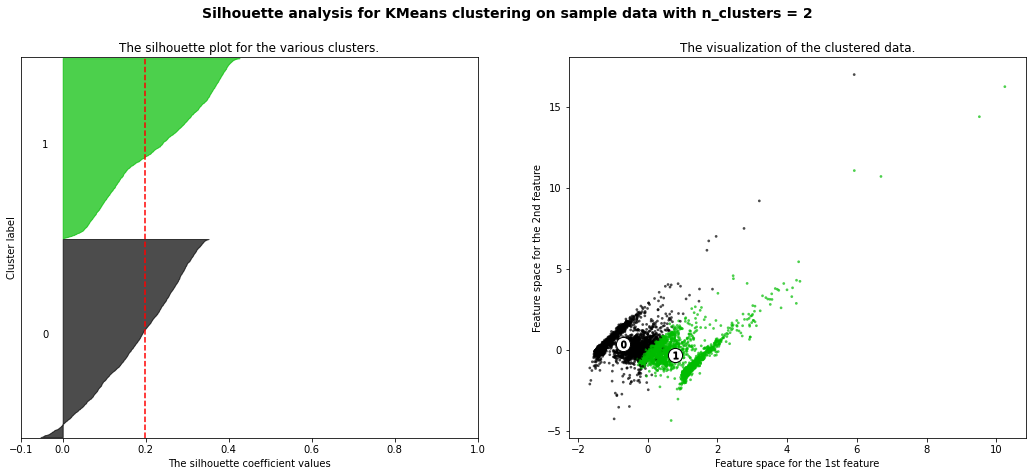

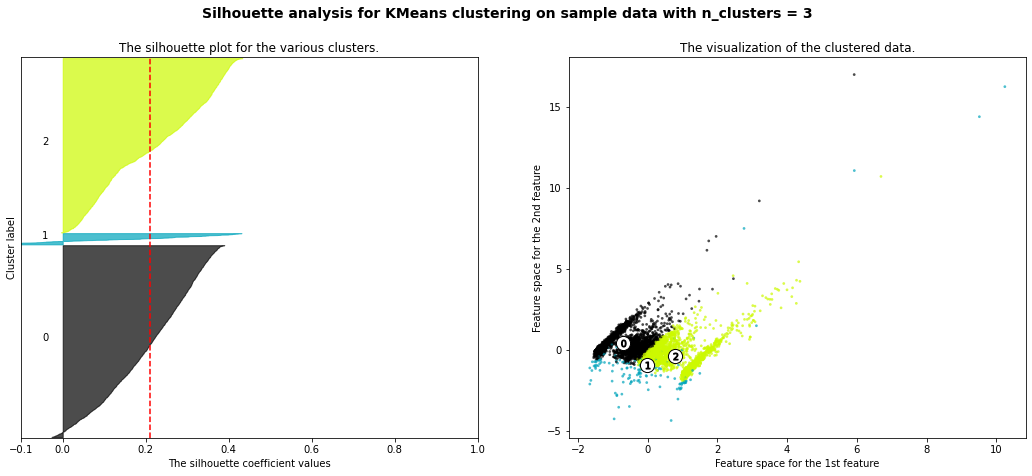

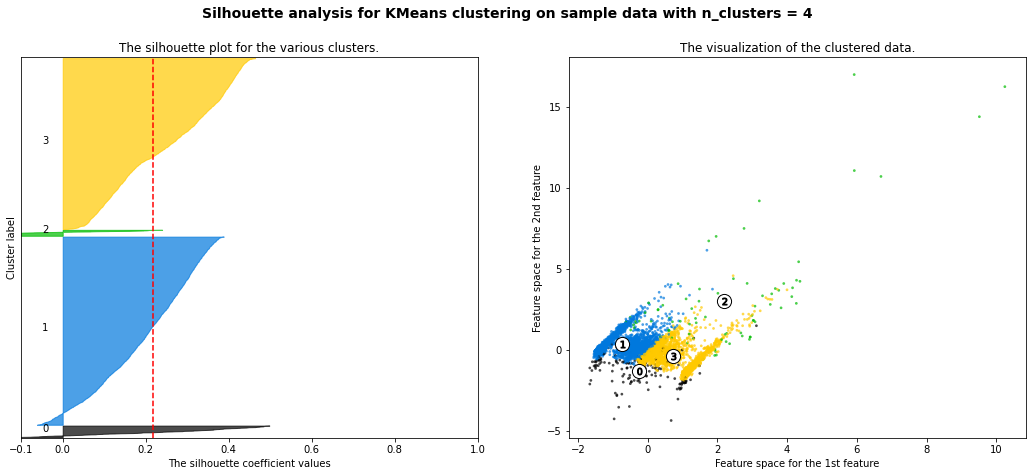

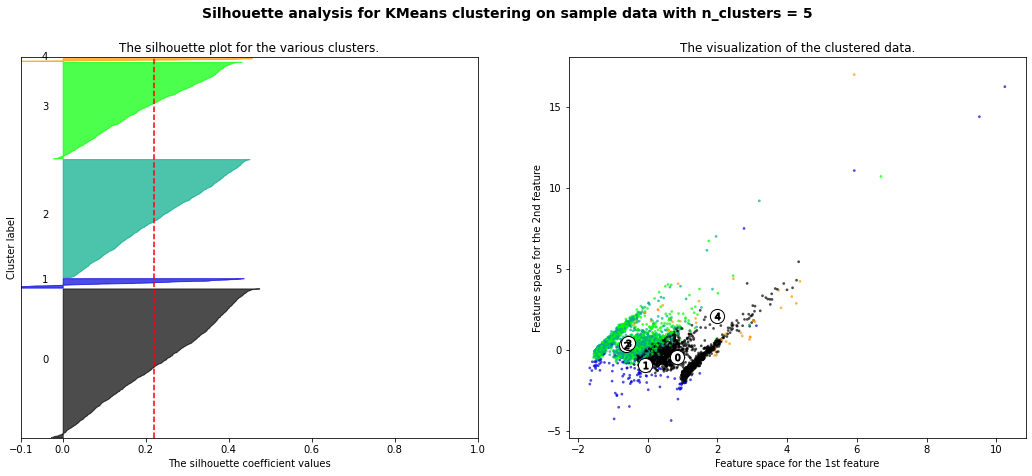

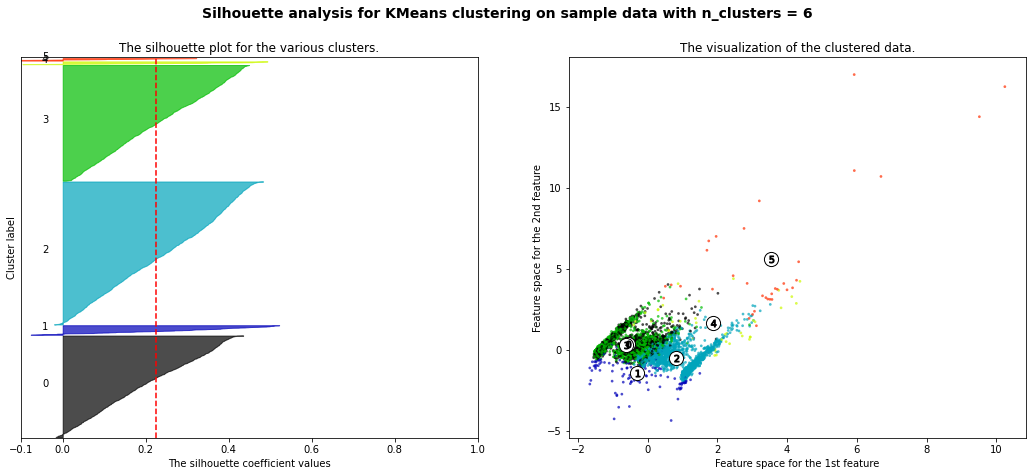

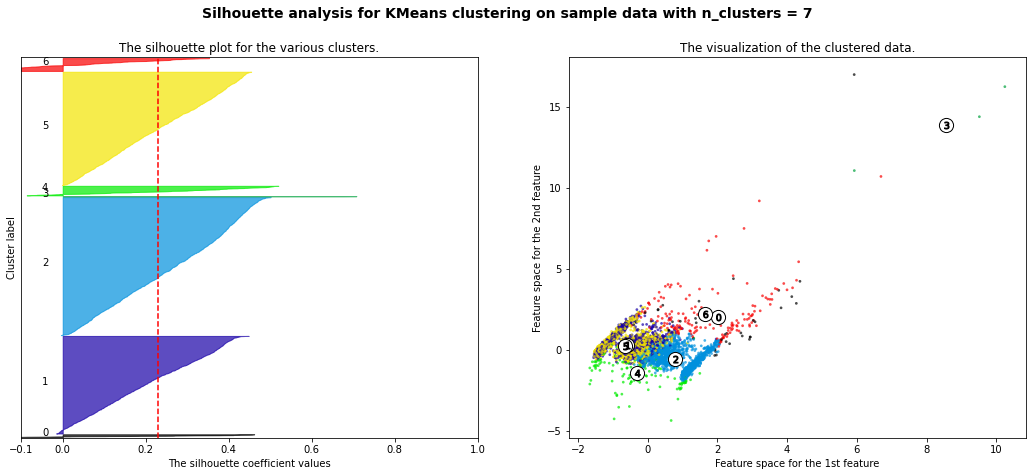

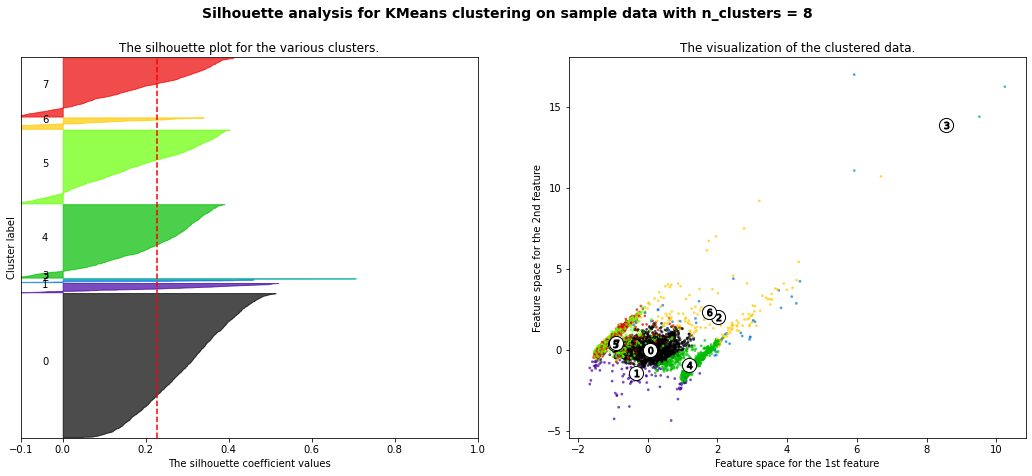

In [29]:
# YOUR CODE HERE
visualize_silhouette(max_clusters = 8, X = X_reduced)

6. Instantiate a k-mean model using the number of cluster that you deem optimal, assign it to `km`, and fit on the reduced data. 

In [30]:
# YOUR CODE HERE
kmeans_model = KMeans(n_clusters =4, random_state = 10).fit(X_reduced)

7. What is the size of each cluster? 

In [31]:
# YOUR CODE HERE
cluster_label = kmeans_model.predict(X_reduced)
past['cluster_pca'] = cluster_label

print('cluster 0 has',len(past.loc[past['cluster_pca']==0]),'values')
print('cluster 1 has',len(past.loc[past['cluster_pca']==1]),'values')
print('cluster 2 has',len(past.loc[past['cluster_pca']==2]),' values')
print('cluster 3 has',len(past.loc[past['cluster_pca']==3]),'values')

cluster 0 has 153 values
cluster 1 has 2498 values
cluster 2 has 80  values
cluster 3 has 2269 values


8. Create a new column called `cluster_pca` in `past`, with values as predicted cluster index predicted by `km`. 

9. Open ended: manipulate `past` and see if you can characterize each cluster (e.g., calculate statistics of / visualize features for each cluster), how will you intepret the results? 

    **Note**. This is probably the most important part as far as the business stakeholders are concerned: "*What can I do with your results?*" The math, modeling part is relatively easy, compared to actionable recommendations you make for business. Thus, before jumping on a different algorithm for the given task, do you best to 1) understand the data in depth 2) keep buisiness use cases in mind throughout all steps. 

In [35]:
past.loc[past['cluster_pca'] == 3].describe()

,product_id,user_id,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,...,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Purchased?,Noon,Category,cluster_pca
count,2.269000e+03,2.269000e+03,2269.000000,2269.000000,2.269000e+03,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,...,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.000000,2269.0
mean,5.603566e+06,5.329790e+08,1.894466,1.306058,2.645238e+05,6.171699,6.139474,0.526938,0.878598,0.387184,...,0.217219,0.063962,0.157526,0.252335,0.165177,0.082702,0.334509,0.061079,1.130626,3.0
std,1.110956e+06,5.846978e+07,0.964192,0.448491,7.127934e+05,5.617772,5.599163,0.464805,0.620343,0.509641,...,0.278292,0.169371,0.236343,0.288038,0.244727,0.181804,0.471922,0.155040,0.398860,0.0
min,4.185000e+03,1.219156e+08,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0
25%,5.770183e+06,5.072568e+08,1.000000,1.000000,0.000000e+00,2.570000,2.540000,0.000000,0.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
50%,5.838932e+06,5.405354e+08,1.750000,1.177778,2.968000e+03,4.595000,4.518750,0.500000,1.000000,0.205882,...,0.142857,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,3.0
75%,5.884076e+06,5.713841e+08,2.250000,1.500000,2.143645e+05,7.460000,7.460000,0.882353,1.000000,0.600000,...,0.333333,0.034483,0.250000,0.400000,0.250000,0.090909,1.000000,0.045455,1.044118,3.0
max,5.932538e+06,6.220262e+08,12.500000,6.000000,1.025309e+07,33.320000,33.320000,4.500000,8.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.0


10. What are the assumptions for k-means? Judging by the cluster sizes, is k-means a good approach? 

    Scanning the list of [clustering algorithms](https://scikit-learn.org/stable/modules/clustering.html) implemented in scikit-learn, try at least one other algorithm, examine its assumptions, and intepret results.

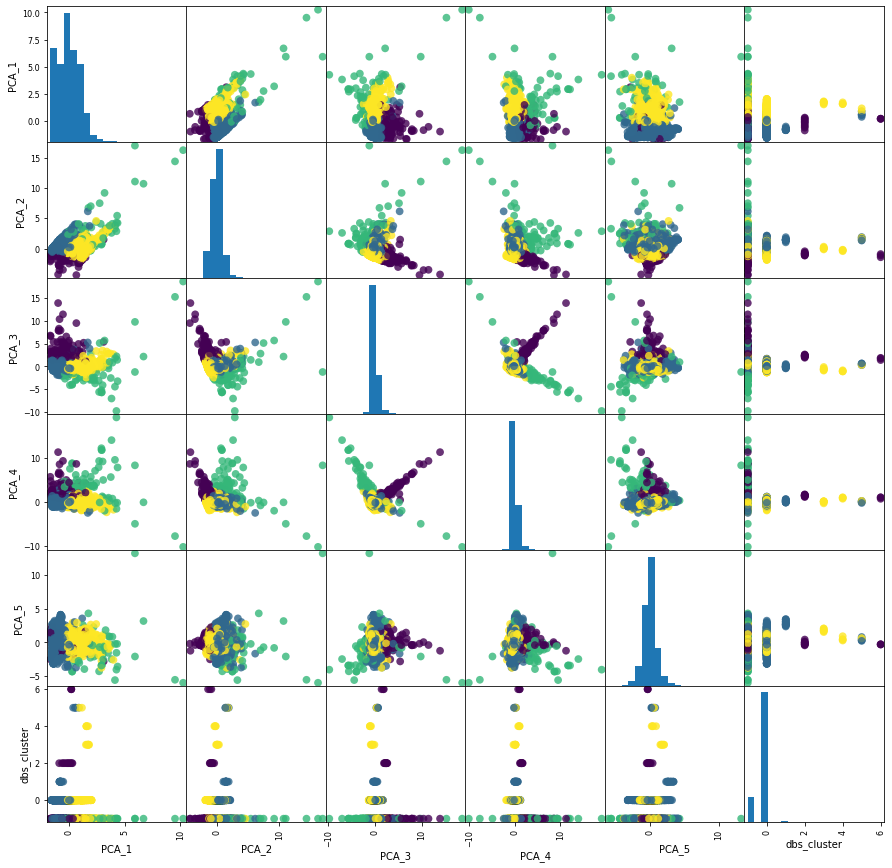

In [109]:
X_red_w_labels = pd.DataFrame(X_reduced,columns = ['PCA_1','PCA_2','PCA_3','PCA_4','PCA_5'])

grr = pd.plotting.scatter_matrix(X_red_w_labels,c = cluster_label, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

In [129]:
from sklearn.cluster import DBSCAN
dbs_model = DBSCAN(min_samples = 50).fit(X_reduced)
dbs_cluster_label = dbs_model.labels_

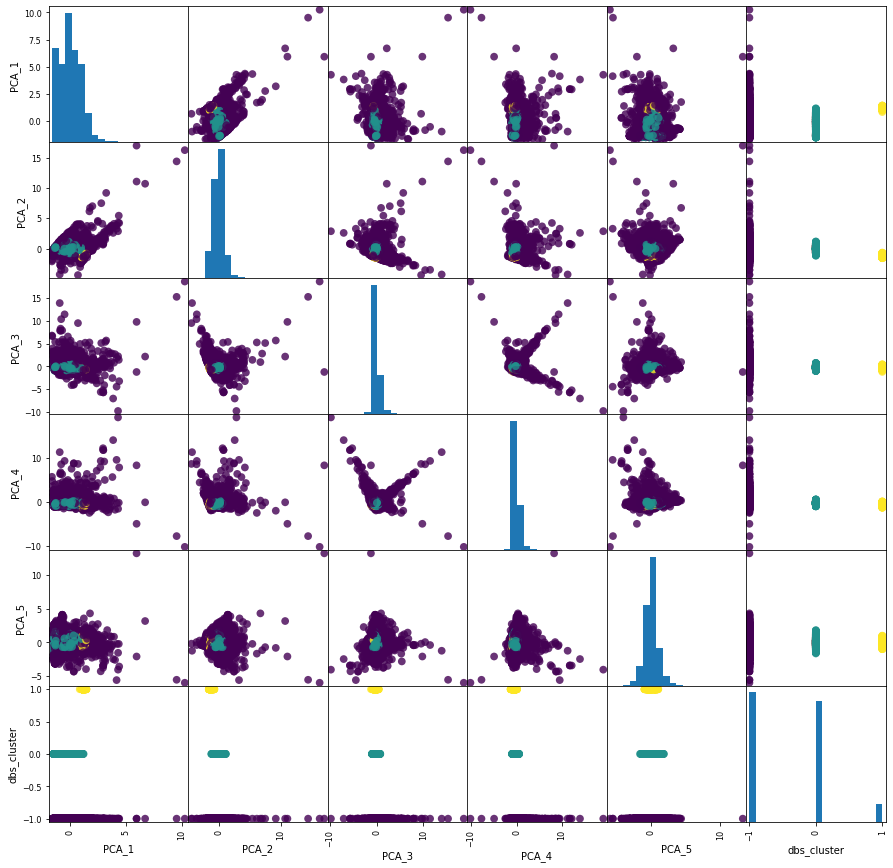

In [130]:
X_red_w_labels['dbs_cluster'] = dbs_cluster_label

grr = pd.plotting.scatter_matrix(X_red_w_labels,c = dbs_cluster_label, figsize=(15, 15), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)

(-5.0, 5.0)

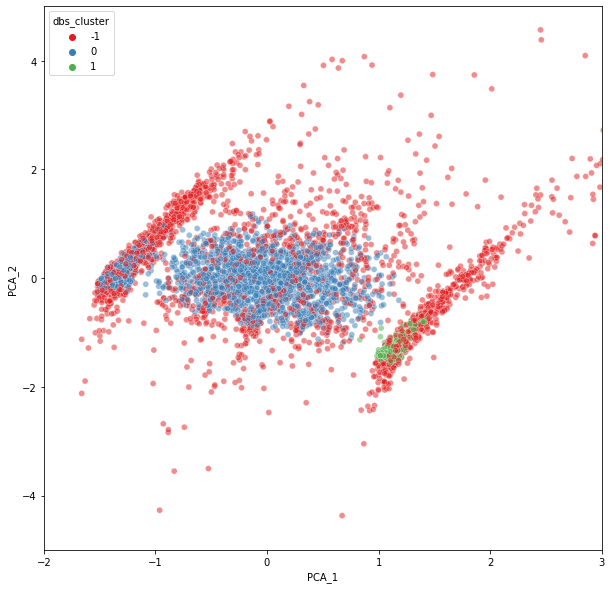

In [131]:
import seaborn as sns
plt.figure(1,figsize = (10,10))
sns.scatterplot(data = X_red_w_labels, x = 'PCA_1', y ='PCA_2', hue = 'dbs_cluster', palette = 'Set1', alpha = 0.5)
# plt.scatter(X_reduced[:,0],X_reduced[:,1],s = 2,c = dbs_cluster_label, alpha = 0.4)
plt.xlim(-2, 3)
plt.ylim(-5,5)

11. Jot down recommendations or followup steps, detailing the reasons.

I wanted to play with DBScan and by adjusting min_samples and eps I really can't get a better image... I think we should consider a hierarchial approach maybe?

## Task 3. To launch or not to launch?

In this task, we will work on a hypothetical application: cosmetics purchase prediction for new products with limited features. The intention here is to maximize **recall** so that no popular cosmetic is understocked. Overstocking is less of a concern since it will not cause disengagement in customers.

The purchase status for each "new" product is known, but we only use the labels for benchmarking purpose. Instead, we use label spreading method to leverage a small amount of labeled data in combination with a larger amount of unlabeled data. 

1. Read in the data in `new.csv.gz` and save it as a `pd.DataFrame` named `new`. This is the test dataset.

    Look at the shape of `new` and inspect the frist few rows.

In [79]:
# YOUR CODE HERE
new =  pd.read_csv('../dat/new.csv.gz')

In [80]:
assert new.shape == (30091, 5)

In [132]:
new.head()

,product_id,maxPrice,minPrice,Purchased?,Category
0,5866502,7.616667,7.616667,0,1.0
1,5870408,6.270000,6.270000,0,3.0
2,5900580,10.008000,10.008000,0,1.0
3,5918778,5.980000,5.980000,0,2.5
4,5848772,26.830000,26.830000,0,1.0


2. How does the number of data points in the training set (`past`) compare to the number of datapoints in the test set (`new`)? 

    And how does the feature set in the training set compare to the feature set in the test set?'
        *The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*

3. Are there any product ids in both the training and test datasets? Hint: use `np.intersect1d` or set operations.

In [137]:
import numpy as np
print(f"there are {len(np.intersect1d(new['product_id'], past['product_id']))} overlapping product ids")

there are 0 overlapping product ids


4. What percentage of data points resulted in a purchase in the test set?

    In reality, we won't be able to calculate information that is not available to you. Here, we simply demonstrated that the distributions in target between `past` and `new` are similar. 

In [142]:
# YOUR CODE HERE # ~.344
print(np.round(new['Purchased?'].mean()*100,2))

34.43


5. Create `ndarray`s: `X_train`, `y_train`, `X_test`, and `y_test` according to the following guidelines.

    - The `Purchased?` column is the target.
    - `X_train` and `X_test` should contain the same features
    - `product_id` should not be a feature.

    Double check that the shapes of the four arrays are what you expect.

In [156]:
# YOUR CODE HERE
columns = [i for i in new.columns if '?' not in i if 'id' not in i]
X_train = past[columns].to_numpy()
X_test = new[columns].to_numpy()
y_train = past['Purchased?'].to_numpy()
y_test = new['Purchased?'].to_numpy()

In [157]:
assert X_train.shape[0] == y_train.shape[0] # 5000
assert X_train.shape[1] == X_test.shape[1]  # 3

assert type(X_train) == np.ndarray # make sure you import numpy as np at this point
assert type(X_train).__module__ == type(y_train).__module__ == np.__name__  # alternative way

6. Let's fit a simple logistic regression on the training set (`X_train`, `y_train`) and report performance on the test set (`X_test`, `y_test`).

In [161]:
# YOUR CODE HERE
lr_new = LogisticRegression(class_weight = 'balanced')
lr_new.fit(X_train, y_train)
predictions = lr_new.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



7. Re-assemble data for semi-supervised learning. 
    - Use the features from the test set along with the features from the training set. 
    - Only use the labels from the training set but none from the test set.  
    
    Since we're using a large number of sampled features, but only a small number of these samples have labels, this is **semi-supervised learning**.

Create a matrix `X` that has the rows from `X_train` concatenated with the rows from `X_test`. Check the shape of the matrix.

In [165]:
# YOUR CODE HERE
X = np.concatenate((X_train, X_test), axis =0)

In [166]:
assert X.shape == (35091, 3)

Create the target array `y` by concatenating `y_train` with a vector of -1's, effectively creating a dummy label for the `X_test` rows in `X`. Check the shape of the array. It should have as many values as `X` has rows.

In [170]:
# YOUR CODE HERE
y = np.concatenate((y_train,np.ones(y_test.shape)*-1))

In [171]:
assert X.shape[0] == y.shape[0]

8. Semi-supervised learning. 

    Scikit-learn provides two label propagation models: [`LabelPropagation`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html) and [`LabelSpreading`](https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelSpreading.html). Both work by constructing a similarity graph over all items in the input dataset. `LabelSpreading` is similar to the basic Label Propagation algorithm, but it uses an affinity matrix based on the normalized graph Laplacian and soft clamping across the labels; thus more robust to noise. We will be using scikit-learn's `LabelSpreading` model with `kNN`.
    
    Train a `LabelSpreading` model. Set `kernel` to `knn` and `alpha` to 0.01.

In [175]:
# YOUR CODE HERE
from sklearn.semi_supervised import LabelSpreading
ls_model = LabelSpreading(kernel = 'knn', alpha = 0.01)
ls_model.fit(X, y)

LabelSpreading(alpha=0.01, kernel='knn')

9. Extract the predictions for the test data. 

    You can get the predictions from the `transduction_` attribute. Note that there is a value for every row in `X`, so select just the values that correspond to `X_test`.

In [178]:
semi_sup_preds = ls_model.transduction_[X_train.shape[0]:]

In [179]:
assert semi_sup_preds.shape[0] == X_test.shape[0]

10. Print the classification report

In [180]:
print(classification_report(y_test, semi_sup_preds)) # make sure you properly import classification_report

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     19732
           1       0.76      0.64      0.69     10359

    accuracy                           0.81     30091
   macro avg       0.79      0.77      0.78     30091
weighted avg       0.80      0.81      0.80     30091



Let's bring the performance from the supervised learning model down to see the comparison; discuss the areas of improvement and reasons for improvement.

In [181]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.94      0.85     19732
           1       0.81      0.49      0.61     10359

    accuracy                           0.79     30091
   macro avg       0.80      0.72      0.73     30091
weighted avg       0.79      0.79      0.77     30091



11. Read [Small Data Can Play a Big Role in AI](https://hbr.org/2020/02/small-data-can-play-a-big-role-in-ai) and discuss with your teammate about AI tools for training AI with small data and their use cases. 

## In Notebook Answer:

1. What percentage of the interactions (rows) resulted in a purchase?
    - 34.38% of the purchase row are purchases
    
    1b. Do people mostly buy what they look at or do they do a lot of "window shopping" (shopping around without buying)?
    - ~40 of people seem to shop, which is pretty good
    
    1c. is this an imbalanced class
    - technically, but I wouldn't really consider 60/40 to be largely imbalanced 
    
2. Do you need to preprocess the data before performing PCA?
    - Yes, the power of PCA is to try to determine the max variance of the features. If a feature appears to have less variance because of its scale, it may be mistaken as having no real effects but in reality the scale just skews the interpertation. For instance, a scale of 1-10 vs 1-100 where the first scale is tons, and the second is pounds. 
2. Are the results as expected? Discuss the pros and cons using reduced set of features in this application with your teammate.
    - The results are pretty expected, we're interested in predicting the positive class (Purchased? = 1) but both models don't perform particularly well here. We're able to identify fairly well (~.7 p/r/f1) if users will not purchase, but we're barely better than random (.5) for if users will Purchase. Partially due to the limited examples of the positive class.
    - cons: explainability is down with PCA, doesn't Really make the score better
    - pros: faster run time (though this model is so fast anyways..)
2. Should you include standardization in the pipeline?
    - In general, Yes, the best pipelines can take in a datasource and do the necessary operations. HOWEVER here, no, we're using the PCA reduced dataset, so this is post scaling and post PCA. Scaling again doesn't make sense
2. What are the disadvantages of using the elbow plot?
    - Way to subjective, we just all laughed about how good arguments can be made for 4-6 clusters. 
2. What are the assumptions of kmeans?
    1. clusters are similar in shape and size (spherical)
        - we don't really see that here. Our best looking silhouette is 2, all others have skinny or negative dips which are undesirable. We definitley need a different algo
2. Which Clustering algo did I choose and what are its pros and cons:
    - I chose DBScan, because I wanted something that wasn't going to depend on same cluster size and that would be insensitive to outliers... but I don't feel like it really worked. 
    - It appears that even as I scaled distance (eps) we just get a lot of points belonging to cluster 0 and no real good information about other clusters. It's really not well suited because of the differences in density. I think we should go back and try other methods...
3. How does the number of data points in the training set (past) compare to the number of datapoints in the test set (new) And how does the feature set in the training set compare to the feature set in the test set?'
    - The number of datapoints in the training set is relatively small while the test set is quite large. The training set has more features than in the test set.*
3. Are there any product ids in both the training and test datasets? Hint: use np.intersect1d or set operations
    - No
3. semi-supervised vs supervised learning:
     - we wanted to optimze for recall, and with the semi-supervised method we were able to increase our recall by 0.2. This is a huge improvement. Other metrics were similarly increased, or mostly stayed the same. The reason for this is the strength of semi-supervised learning. By utilizing a small amount of labeled date (1:6 labels:unlabeled), the semi-supervised labeling method was able to spread the labels from the labeled data down to the unlabeled "look alike" data. This is because of the labelspreading using an affinity matrix to find similar data to the already labeled data. 

## Acknowledgement & References

- data was adapted from Kaggle: [eCommerce Events History in Cosmetics Shop](https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop)
- function `visualize_silhouette` was adapted from [plot_kmeans_silhouette_analysis by scikit-learn](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)
- [Categorizing Online Shopping Behavior from Cosmetics to Electronics: An Analytical Framework](https://arxiv.org/pdf/2010.02503.pdf)
- [OPAM: Online Purchasing-behavior Analysis using Machine learning](https://arxiv.org/pdf/2102.01625.pdf)